In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# List of Drugs to Analyze
drug_list = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

# Graph markers
graph_markers = ["o","^","s","d","H",">","*","v"]

In [2]:
# Read the Mouse and Drug Data
df_mouse_drug = pd.read_csv(mouse_drug_data_to_load)
df_mouse_drug.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
# Read the Clinical Trial Data
df_Clini_trial = pd.read_csv(clinical_trial_data_to_load)
df_Clini_trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
df_drug_response = pd.merge(df_mouse_drug, df_Clini_trial, how="inner", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
df_drug_response

# Drug under comparision study, get the list from "drug_list"
# Create a Dataframe by filtering the drugs under study
df_4drug_response = df_drug_response[df_drug_response.Drug.isin(drug_list)]
df_4drug_response

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [5]:
# Group the data based on Drug and Timepoint
response_byDgTp = df_4drug_response.groupby(["Drug","Timepoint"])

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
df_Mean_TumorVol_DgTp = response_byDgTp \
    .agg(
    {        
        "Tumor Volume (mm3)" : "mean"
    })
df_Mean_TumorVol_DgTp = df_Mean_TumorVol_DgTp.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Vol (mm3)"})

# Convert to DataFrame
df_Mean_TumorVol_DgTp.reset_index(inplace=True)

# Preview DataFrame
df_Mean_TumorVol_DgTp

,Drug,Timepoint,Mean Tumor Vol (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df_SE_TumorVol_DgTp = response_byDgTp \
    .agg(
    {        
        "Tumor Volume (mm3)" : "sem"
    })
df_SE_TumorVol_DgTp = df_SE_TumorVol_DgTp.rename(columns={"Tumor Volume (mm3)": "SE Tumor Vol (mm3)"})

# Convert to DataFrame
df_SE_TumorVol_DgTp.reset_index(inplace=True)

# Preview DataFrame
df_SE_TumorVol_DgTp

,Drug,Timepoint,SE Tumor Vol (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [8]:
# Minor Data Munging to Re-Format the Data Frames - Mean Tumor Volume
# Reformating the Mean Tumor Volume Dataframe
df_Mean_TumorVol_ReF = df_Mean_TumorVol_DgTp.pivot(index ='Timepoint', columns ='Drug')

# Preview that Reformatting worked
df_Mean_TumorVol_ReF =  df_Mean_TumorVol_ReF["Mean Tumor Vol (mm3)"]
df_Mean_TumorVol_ReF.reset_index(inplace=True)
df_Mean_TumorVol_ReF = df_Mean_TumorVol_ReF.rename(columns={"Drug": "Index"})
df_Mean_TumorVol_ReF

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


In [9]:
# Minor Data Munging to Re-Format the Data Frames - Standard Error for Tumor Volume
# Reformating the Standard Error Tumor Volume Dataframe
df_SE_TumorVol_ReF = df_SE_TumorVol_DgTp.pivot(index ='Timepoint', columns ='Drug')

# Preview that Reformatting worked
df_SE_TumorVol_ReF =  df_SE_TumorVol_ReF["SE Tumor Vol (mm3)"]
df_SE_TumorVol_ReF.reset_index(inplace=True)
df_SE_TumorVol_ReF = df_SE_TumorVol_ReF.rename(columns={"Drug": "Index"})
df_SE_TumorVol_ReF

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.235102,0.264819,0.218091
2,10,0.702684,0.282346,0.357421,0.402064
3,15,0.838617,0.357705,0.580268,0.614461
4,20,0.909731,0.476210,0.726484,0.839609
5,25,0.881642,0.550315,0.755413,1.034872
6,30,0.934460,0.631061,0.934121,1.218231
7,35,1.052241,0.984155,1.127867,1.287481
8,40,1.223608,1.055220,1.158449,1.370634
9,45,1.223977,1.144427,1.453186,1.351726


In [10]:
# df_Mean_TumorVol_ReF.columns.values
for column in df_Mean_TumorVol_ReF.columns:
    print(column)

Timepoint
Capomulin
Infubinol
Ketapril
Placebo


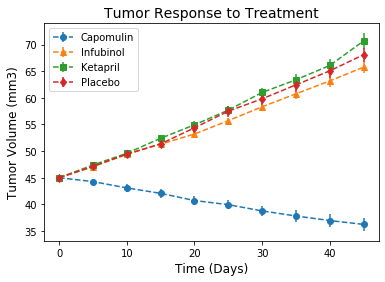

In [11]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
i=0
for drug in drug_list:  
    
    ax.errorbar(df_Mean_TumorVol_ReF["Timepoint"], \
                df_Mean_TumorVol_ReF[drug], \
                yerr=df_SE_TumorVol_ReF[drug], \
                label=drug, fmt=graph_markers[i], linestyle='--')
    i=i+1

#Legend: Place it for best fit
ax.legend(loc='best', frameon=True)

#Title, X and Y axis labels
ax.set_title('Tumor Response to Treatment', fontsize=14)
ax.set_xlabel('Time (Days)', fontsize=12)
ax.set_ylabel('Tumor Volume (mm3)', fontsize=12)

# Save the Figure
fig.savefig("Images/Tumor_Response_to_Treatment.png")

In [12]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
df_Mean_Meta_DgTp = response_byDgTp \
    .agg(
    {        
        "Metastatic Sites" : "mean"
    })
df_Mean_Meta_DgTp = df_Mean_Meta_DgTp.rename(columns={"Metastatic Sites": "Mean Metastatic Sites"})

# Convert to DataFrame
df_Mean_Meta_DgTp.reset_index(inplace=True)

# Preview DataFrame
df_Mean_Meta_DgTp

,Drug,Timepoint,Mean Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
df_SE_Meta_DgTp = response_byDgTp \
    .agg(
    {        
        "Metastatic Sites" : "sem"
    })
df_SE_Meta_DgTp = df_SE_Meta_DgTp.rename(columns={"Metastatic Sites": "SE Metastatic Sites"})

# Convert to DataFrame
df_SE_Meta_DgTp.reset_index(inplace=True)

# Preview DataFrame
df_SE_Meta_DgTp


,Drug,Timepoint,SE Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [15]:
# Minor Data Munging to Re-Format the Data Frames - Mean for Metastatic Site
# Reformating the Mean Metastatic Site Dataframe
df_Mean_Meta_ReF = df_Mean_Meta_DgTp.pivot(index ='Timepoint', columns ='Drug')

# Preview that Reformatting worked
df_Mean_Meta_ReF =  df_Mean_Meta_ReF["Mean Metastatic Sites"]
df_Mean_Meta_ReF.reset_index(inplace=True)
df_Mean_Meta_ReF


Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316
5,25,0.818182,1.277778,1.631579,1.941176
6,30,1.090909,1.588235,2.055556,2.266667
7,35,1.181818,1.666667,2.294118,2.642857
8,40,1.380952,2.100000,2.733333,3.166667
9,45,1.476190,2.111111,3.363636,3.272727


In [16]:
# Minor Data Munging to Re-Format the Data Frames - Standard Error for Metastatic Site
# Reformating the Standard Error Metastatic Site Dataframe
df_SE_Meta_ReF = df_SE_Meta_DgTp.pivot(index ='Timepoint', columns ='Drug')

# Preview that Reformatting worked
df_SE_Meta_ReF =  df_SE_Meta_ReF["SE Metastatic Sites"]
df_SE_Meta_ReF.reset_index(inplace=True)
df_SE_Meta_ReF = df_SE_Meta_ReF.rename(columns={"Drug": "Index"})
df_SE_Meta_ReF

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.091652,0.098100,0.100947
2,10,0.125433,0.159364,0.142018,0.115261
3,15,0.132048,0.194015,0.191381,0.190221
4,20,0.161621,0.234801,0.236680,0.234064
5,25,0.181818,0.265753,0.288275,0.263888
6,30,0.172944,0.227823,0.347467,0.300264
7,35,0.169496,0.224733,0.361418,0.341412
8,40,0.175610,0.314466,0.315725,0.297294
9,45,0.202591,0.309320,0.278722,0.304240


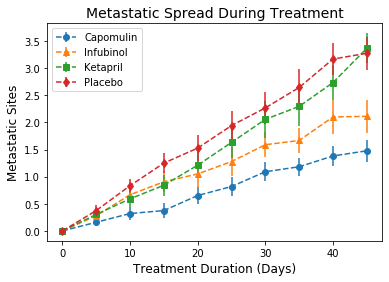

In [17]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
i=0
for drug in drug_list:  
    
    ax.errorbar(df_Mean_Meta_ReF["Timepoint"], \
                df_Mean_Meta_ReF[drug], \
                yerr=df_SE_Meta_ReF[drug], \
                label=drug, fmt=graph_markers[i], linestyle='--')
    i=i+1

#Legend: Place it for best fit
ax.legend(loc='best', frameon=True)

#Title, X and Y axis labels
ax.set_title('Metastatic Spread During Treatment', fontsize=14)
ax.set_xlabel('Treatment Duration (Days)', fontsize=12)
ax.set_ylabel('Metastatic Sites', fontsize=12)

# Save the Figure
fig.savefig("Images/Metastatic_Spread_During_Treatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [18]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
df_Survival_Count_DgTp = response_byDgTp \
    .agg(
    {        
        "Mouse ID" : "count"
    })
df_Survival_Count_DgTp = df_Survival_Count_DgTp.rename(columns={"Mouse ID": "Mouse Count"})

# Convert to DataFrame
df_Survival_Count_DgTp.reset_index(inplace=True)

# Preview DataFrame
df_Survival_Count_DgTp

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [19]:
# Create a Dataframe for the starting count of mouse in each of the drug studies
df_Mouse_Tested = df_Survival_Count_DgTp[df_Survival_Count_DgTp.Timepoint.isin(['0'])]
df_Mouse_Tested

df_Survival_DgTp = pd.merge(df_Survival_Count_DgTp, df_Mouse_Tested, how="inner", \
                            on=["Drug", "Drug"], suffixes=("", " Total"))
df_Survival_DgTp = df_Survival_DgTp.drop(["Timepoint Total"], axis=1)
# df_Survival_DgTp = df_Survival_DgTp
df_Survival_DgTp["Mouse Count Pct"] = df_Survival_DgTp["Mouse Count"] * 100.00 / df_Survival_DgTp["Mouse Count Total"]
df_Survival_DgTp

,Drug,Timepoint,Mouse Count,Mouse Count Total,Mouse Count Pct
0,Capomulin,0,25,25,100.0
1,Capomulin,5,25,25,100.0
2,Capomulin,10,25,25,100.0
3,Capomulin,15,24,25,96.0
4,Capomulin,20,23,25,92.0
5,Capomulin,25,22,25,88.0
6,Capomulin,30,22,25,88.0
7,Capomulin,35,22,25,88.0
8,Capomulin,40,21,25,84.0
9,Capomulin,45,21,25,84.0


In [27]:
# Minor Data Munging to Re-Format the Data Frames - Mouse Count
# Reformating the Mouse Count Dataframe
df_Survival_ReF = df_Survival_DgTp.pivot(index ='Timepoint', columns ='Drug')

# Preview that Reformatting worked
df_Survival_ReF = df_Survival_ReF["Mouse Count Pct"]
df_Survival_ReF.reset_index(inplace=True)
df_Survival_ReF


Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,100.0,100.0,100.0,100.0
1,5,100.0,100.0,92.0,96.0
2,10,100.0,84.0,88.0,96.0
3,15,96.0,84.0,76.0,80.0
4,20,92.0,80.0,76.0,76.0
5,25,88.0,72.0,76.0,68.0
6,30,88.0,68.0,72.0,60.0
7,35,88.0,48.0,68.0,56.0
8,40,84.0,40.0,60.0,48.0
9,45,84.0,36.0,44.0,44.0


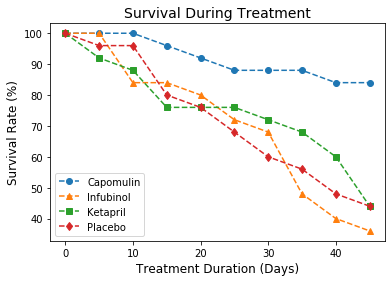

In [29]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()
i=0
for drug in drug_list:  
    
    ax.plot(df_Survival_ReF["Timepoint"], \
                df_Survival_ReF[drug], \
                label=drug, marker=graph_markers[i], linestyle='--')
    i=i+1

#Legend: Place it for best fit
ax.legend(loc='best', frameon=True)

#Title, X and Y axis labels
ax.set_title('Survival During Treatment', fontsize=14)
ax.set_xlabel('Treatment Duration (Days)', fontsize=12)
ax.set_ylabel('Survival Rate (%)', fontsize=12)

# Save the Figure
fig.savefig("Images/Survival_Rate_During_Treatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [22]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [23]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)